### TMA4215 Numerisk Matematikk 

Høst 2021 – Tuesday, October 19, 2021

R. Bergmann, E. Çokaj, O. P. Hellan 

# Project 2: Bézier Curves and Interpolation

### Notes

**Groups.** This project is a group project and can be solved in groups of _up to three_ students. Feel free to use for example the Forum to find each other. Eventually it will be possible to register groups in Inspera. One person (per group) can create a group and will get a PIN code which can be used by the other group members for registering.

**Requirements for submission.** The submission is in [Inspera](https://ntnu.inspera.no/). Each group must submit their onw report. It is not allowed to copy from other groups.

All code – also the tests – should be in individual cells that can just be run (as soon as the necessary functions are defined). Functions should only be used in cells _after_ their definition, such that an evaltuation in order of the notebook does not yield errors.

It is not possible to have an extension for this project.

**Supervision.** For questions the usual time, Thursday, 18.15–20.00 can be used. Questions can also be asked in the Mattelab forum.

### Submission Deadline
Tuesday, November 9, 2021.

## Introduction

In this project we consider another possibility to perform interpolation with piecewise polynomials, namely from the family of parametrized curves.

Let $\mathbf p_0,\ldots, \mathbf p_n\in \mathbb R^d$ (usually $d=2$ or $d=3$) denote $n+1$ ordered points.

Then the $n$th degree Bézier curve is defined by

$$
\mathbf c(t) = \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i,
$$

where $B_{n,i}(t)$ are the $n$th degree _Bernstein polynomials_. We use the first notation, $\mathbf c(t)$ when the points are clear from context, and the second, $\mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ to emphasize the dependency of the nodes and/or the degree $n$.

$$
  B_{i,n}(t) = {n \choose i}t^i(1-t)^{n-i}, \qquad i=0,\ldots,n,
$$

where ${n \choose i} = \frac{n!}{i!(n-i)!}$ denotes the binomial coefficient.

To get familiar with the first few Bernstein polynomials it might be good to write down $B_{0,0}, B_{0,1}, B_{1,1}, B_{0,2}, B_{1,2},$ and $B_{2,2}.$ 

$
B_{0,0} = 1
$
, 
$
B_{0,1} = 1-t
$
, 
$
B_{1,1} = t
$
$
B_{0,2} = (1-t)^2
$
, 
$
B_{1,2} = 2t(1-t)
$
, 
$
B_{2,2} = t^2
$

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
np.set_printoptions(precision=3)
from datetime import datetime
import scipy.linalg as lng

## Problem 1: Properties of Bernstein polynomials

Let $n\in \mathbb N$ be given. We consider the Bernstein polynomials $B_{i,n}(t)$, $i=0,\ldots,n$.

1. Show that $B_{i,n}(t) \geq 0$ for all $t\in [0,1]$.

A product of two positive factors is itsef positive. The binomial coefficient is a positive number, the same holds for $t $ and $(1-t)$ in the range $t \in [0, ]$$\blacksquare$

2. Show that the Bernstein polynomials for $0<i<n$ can be recursively defined by
  
   $$
   B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t), \qquad t \in [0,1].
   $$
  
   How does this look like for $B_{0,n}$ and $B_{n,n}$? 

Basecase we have $B_{0,0} = 1$ and $B_{i \neq 0,0} = 0$. This corresponds to the Bernstein polynomial formula.
If we assume then that $B_{i,n}$ corresponds to their formula. For the cases $B_{0,n+1}$ and $B_{n+1,n+1}$ we get their corresponding formulas $B_{0,n+1} = (1-t)B_{0,n}$ and $B_{n+1,n+1} = t B_{n,n}$, this satisfies the formulas as ${n \choose 0}$ = ${n \choose n}$ = $1$.
For the case $B_{i,n+1}, 0 < i < n$ we get $$
   B_{i,n+1}(t) = (1-t){n \choose i}t^i(1-t)^{n-i} + t{n \choose i-1}t^{i-1}(1-t)^{n-i+1}
   = {n \choose i}t^i(1-t)^{n-i+1} + {n \choose i-1}t^{i}(1-t)^{n-i+1}
   =  ({n \choose i}+ {n \choose i-1}) t^{i}(1-t)^{n-i+1}, \qquad t \in [0,1]
   $$
   
From pascals triangle we know that $$ {n \choose i}+ {n \choose i-1} = {n+1 \choose i}
$$ and the rekursion is prooved by induciton. $\blacksquare$

3. Show that the $B_{i,n}(t)$ form a partition of unity, i.e.
   $$
   \sum_{i=0}^n B_{i,n}(t) = 1 \qquad \text{ for } t \in [0,1].
   $$
   _Hint_: Use induction by $n$.

The basecase is trivially partitioned to unity, as the only Bernstein polynomial of degree 0 is the constant 1.
We then assume that    $$
   \sum_{i=0}^n B_{i,n}(t) = 1 \qquad \text{ for } t \in [0,1].
   $$
then 
$$
   \sum_{i=0}^{n+1} B_{i,n+1}(t) = (1-t)B_{0,n}(t) + t B_{n,n}(t) + \sum_{i=1}^{n} (1-t)B_{i,n}(t) + t B_{i-1,n}(t) + = \\
   (1 - t)^{n+1} + t^{n+1} + \sum_{i=1}^{n}{n \choose i}t^i(1-t)^{n-i+1} + {n \choose i-1}t^{i}(1-t)^{n-i+1} = \\
   (1 - t)^{n+1} + \sum_{i=1}^{n}{n \choose i}t^i(1-t)^{n-i+1} + t^{n+1} + \sum_{i=0}^{n-1}{n \choose i}t^{i+1}(1-t)^{n-i} = \\(1-t) \left((1 - t)^{n} + \sum_{i=1}^{n}{n \choose i}t^i(1-t)^{n-i}\right) + t\left(t^{n} + \sum_{i=0}^{n-1}{n \choose i}t^{i}(1-t)^{n-i}\right) = \\
   (1-t) \left(\sum_{i=0}^{n}B_{i,n}\right) + t\left(\sum_{i=0}^{n}{B_{i,n}}\right)
$$
Then by the assumtion this is again $$
1 - t + t = 1 $$
$\blacksquare$


4. Show that the derivative is given by
   
   $$
   B_{i,n}'(t) =  n(B_{i-1,n-1}(t) - B_{i,n-1}(t))
   $$
   
   with $B_{-1,n-1}(u) \equiv B_{n,n-1}(u) \equiv 0$.

Since $B_{i,n}(t) = {n\choose i}t^i(1-t)^{n-i}$ then the derivative must be

$$
\frac{d}{dt} B_{i,n}(t) = \frac{d}{dt}\Bigg({n\choose i}t^i(1-t)^{n-i}\Bigg) = \frac{n!}{i!(n-i)!}\Big(it^{i-1}(1-t)^{n-i} -(n-i)t^i(1-t)^{n-i-1}\Big)
$$

$$
=\frac{n\cdot(n-1)!}{(i-1)!(n-i)!}t^{i-1}(1-t)^{n-i} - \frac{n\cdot(n-1)!}{i!(n-i-1)!}t^i(1-t)^{n-i-1} = n\Bigg({n-1\choose i-1}t^{i-1}(1-t)^{n-i} - {n-1\choose i}t^i(1-t)^{n-i-1}\Bigg) 
$$
$$
= n\left(B_{i-1,n-1}(t) - B_{i,n-1}(t)\right).
$$
Which was what we wanted to show.

5. Implement a function `Bernstein(i,n,t)` that evaluates $B_{i,n}$ at $t$ and plot all functions $B_{i,n}$, $i=0,\ldots,n$ for $n=3$ and $n=9$.

In [72]:
def Bernstein_rek(i, n, t):
    if n == 0:
        return 1
    elif i == n:
        return t*Bernstein_rek(i - 1, n - 1, t)
    elif i == 0:
        return (1 - t)*Bernstein_rek(i, n - 1, t)
    else:
        return t*Bernstein_rek(i - 1, n - 1, t) + (1 - t)*Bernstein_rek(i, n - 1, t)

def Bernstein_closed_form(i, n, t):
    return binom(n, i) * t**i * (1 - t)**(n - i)
    
    

In [73]:
def BernsteinPlotter(n):
    ts = np.linspace(0,1,100)
    B_in = np.zeros((n + 1, len(ts)))
    for i in range(n + 1):
        B_in[i] = np.array([Bernstein_rek(i, n, t) for t in ts])
    plt.title(f"Bernstein polynomials of {n} degrees")
    plt.plot(ts, B_in.transpose())

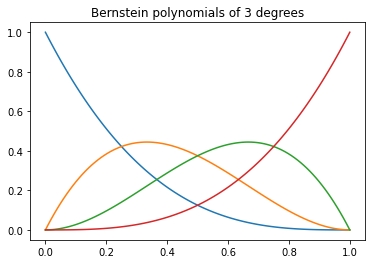

In [74]:
BernsteinPlotter(3)

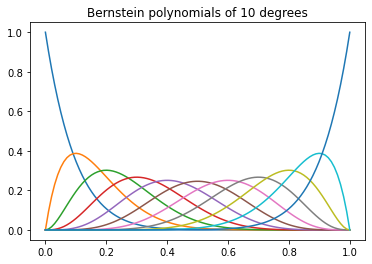

In [75]:
BernsteinPlotter(10)

## Problem 2: Properties of (composite) Bézier curves

We consider the points $\mathbf p_0,\ldots,\mathbf p_n \in \mathbb R^d$ and $\mathbf q_0,\ldots \mathbf q_n\in \mathbb R^d$ and their corresponding Bézier curves $\mathbf c(t) = \mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ and $\mathbf d(t) = \mathbf b(t; \mathbf q_0,\ldots, \mathbf q_n)$, respectively.

In this problem, we will also consider _composite Bézier curves_, or piecewise Bézier curves, e.g. a curve $\mathbf s \colon [0,2] \to \mathbb R^d$ defined by

$$
\mathbf s(t) = \begin{cases}
  \mathbf c(t) & \text{ for } 0 \leq t < 1\\
  \mathbf d(t-1) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$

1. Compute the first two derivatives $\mathbf c'(t)$ and $\mathbf c''(t)$ of $\mathbf c(t).$

We have $$
\mathbf c(t) = \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i
$$
Linearity of the derivative operator we get
$$
\mathbf c'(t) = \mathbf b_n'(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B'_{i,n}(t)\mathbf{p}_i
$$
We have shown the derivative is given the formula $$ n(B_{i-1,n-1}(t) - B_{i,n-1}(t))$$
Inserting this we get 
$$
\mathbf c'(t) = \sum_{i=0}^{n} n(B_{i-1,n-1}(t) - B_{i,n-1}(t))\mathbf{p}_i
$$
and 
$$
\mathbf c''(t) = \sum_{i=0}^{n} n(n-1)(B_{i-2,n-2}(t) - B_{i-1,n-2}(t)) - n(B_{i-1,n-2}(t) - B_{i,n-2}(t)))\mathbf{p}_i
$$

2. What values does $\mathbf c(t)$ attend at its end points? State $\mathbf c(0)$ and $\mathbf c(1).$

We have shown the bernstein polynomials of degree n is partitioned to unity. We have also shown that the $B_{0,n}$ and the $B_{n,n}$ polynomial is given $(1-t)^n$ and $t^n$ respectivly, which is evaluated to $[1,0]$ and $[0,1]$ at the endpoints. These facts together means that $\mathbf c(0) =\mathbf p_0$ and $\mathbf c(1) =\mathbf p_n$, as all other bernsteinpolynomials evaluates to $0$ at the endpoints of the Bezier curve.

3. Prove that the following properties hold:
   1. $\mathbf c'(0) = n(\mathbf p_1-\mathbf p_0),$
   2. $\mathbf c''(0) = n(n-1)(\mathbf p_0-2\mathbf p_1 + \mathbf p_2),$
   3. $\mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1}),$
   4. $\mathbf c''(1) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2}).$

All this tasks is only about taking our formulas for the derivative and count every corresponding $\mathbf p_i$ to when $B_{i,n} = B_{0,n}$ for $\mathbf c(0)$ and $B_{i,n} = B_{n,n}$ for $\mathbf c(1)$

A) $$n(i=1 - i=0) = n(\mathbf p_1 - \mathbf p_0)$$
B) $$n(n-1)(i=2 - i=1 - i=1 + i=0) = n(n-1)(\mathbf p_2 - \mathbf p_1  + \mathbf p_0)$$
C) $$n(i=n - i=n-1) = n(\mathbf p_1 - \mathbf p_0)$$
D) $$n(n-1)(i=n - i=n- 1 - i=n-1 + i=n-2) = n(n-1)(\mathbf p_{n} - \mathbf p_{n-1}  + \mathbf p_{n-2})$$

4. Use the recursion property of Bernstein polynomials to prove the recursive definition
   $$
   \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = (1-t)b_{n-1}(t; \mathbf p_0,\ldots,\mathbf p_{n-1}) + tb_{n-1}(t; \mathbf p_1,\ldots,\mathbf p_n).
   $$

   $$
   \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^n B_{i,n}(t) = \sum_{i=0}^n (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t)
 = (1-t)b_{n-1}(t; \mathbf p_0,\ldots,\mathbf p_{n-1}) + tb_{n-1}(t; \mathbf p_1,\ldots,\mathbf p_n).
   $$


5. The recursion from point 4 of this problem can be used to define the so-called “de Casteljau” algorithm to evaluate $\mathbf b_n(t_0; ; \mathbf p_1,\ldots,\mathbf p_n)$ at $t_0 \in [0,1]$ algorithm:
   
   Starting with $\mathbf p_{0,i}(t_0) = \mathbf p_i$ compute for $k=0,\ldots,n$ and $i=0,\ldots,k$
   
   $$
   \mathbf p_{k,i}(t_0) = (1-t_0)\mathbf p_{k-1,i}(t_0) + t_0\mathbf p_{k-1,i+1}(t_0),
   $$
   then $\mathbf b_n(t_0; ; \mathbf p_1,\ldots,\mathbf p_n) = \mathbf p_{n,0}.$
   
   Implement a function `deCasteljau(P,t)` where `P` is a vector – of $n+1$ points – to evaluate the corresponding  Bézier curve at $t$.
   
   This function should also return (as a second return value) a vector `Pvecs` that contains a vector of points for every “level” $k$ considered.
   
   Plot the corresponding curve for the points 
   
   $$
   \mathbf p_{0} = \begin{pmatrix}0\\0\end{pmatrix},\quad
   \mathbf p_{1} = \begin{pmatrix}2\\3\end{pmatrix},\quad
   \mathbf p_{2} = \begin{pmatrix}4\\0\end{pmatrix},\quad
   \mathbf p_{3} = \begin{pmatrix}6\\-3\end{pmatrix},\quad
   \mathbf p_{4} = \begin{pmatrix}8\\0\end{pmatrix},
   $$
   
   including one line per “level” $k$ connecting the points when evaluating the curve at $t_0 = \frac{1}{3}$

In [76]:
def deCasteljau_rek(P, t):
    n = len(P)
    if n == 1: #on the lowest level we return the point times the updating rule
        return P[0]
    else:
        return (1 - t)*deCasteljau_rek(P[:-1], t) + t*deCasteljau_rek(P[1:], t)

In [77]:
def deCasteljau_closed_form(P, t):
    n = len(P)
    p_ki= np.zeros((n, n, 2))
    p_ki[0,:] = P
    for k in range(1, len(P)):
        p_ki[k,:-k,:] += (1 - t)*p_ki[k-1,:-k,:] + t*p_ki[k-1,k:, :]
#     print(p_ki[:,:,0])
    return p_ki[-1, 0]

In [78]:
P = np.array([[0, 0], [2, 3], [4, 0], [6, -3], [8, 0]])
ts = np.linspace(0,1,100)
sol = np.array([deCasteljau_rek(P, t) for t in ts])
print(f"deCasteljau(P,0) is {deCasteljau_rek(P,0)} and deCasteljau(P,1) is {deCasteljau_rek(P,1)}")

deCasteljau(P,0) is [0 0] and deCasteljau(P,1) is [8 0]


(100, 2)


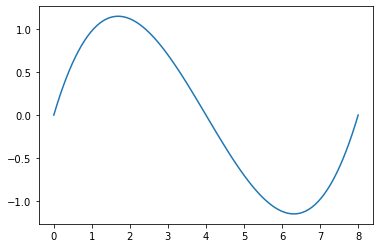

In [79]:
print(np.shape(sol))
plt.plot(sol[:,0], sol[:,1])

6. Consider a _composite Bézier curve_ $\mathbf s(t)$ as described in the beginning of this problem. Assume we want $\mathbf s(t)$ to be a $C^{(k)}$, $k=0,1,2$ function. Then surely, increasing the class $k$ increases the dependent properties we have to impose.
   1. What are the critical points of $\mathbf s(t)$ to investigate for the property to be a $C^{(k)}$ function?
   2. Which properties have to hold for continuity ($k=0$)? 
   3. Which properties have to hold for $\mathbf s(t)$ to be continuously differentiable ($k=1$) ?
   4. Which properties have to hold for $\mathbf s(t)$ to be twice continuously differentiable ($k=2$) ?
   
   Try to simplify the conditions for the third and fourth point based on the properties you derived before.
   
   5. What changes if we want $\mathbf s(t)$ to be periodic, i.e. $s(t) = s(2+t)$ for all $t$ for the continous differentiability case $k=1$? 

A) Only the point $s(1)$ need to be checked, as $s(t)$ is a polynomial for all other t-values, and polynomials are of course $\in \mathbf C^{\infty}$

B) The value of the endpoint of a nth Bezier curve is given by the last point point $p_n$. This means that $p_{0,n} = p_{1,0}$, where $p_{in}$ is the n'th point controlling the i'th compositt curve. 

C,D) Using    

   1. $\mathbf c'(0) = n(\mathbf p_1-\mathbf p_0),$
   2. $\mathbf c''(0) = n(n-1)(\mathbf p_0-2\mathbf p_1 + \mathbf p_2),$
   3. $\mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1}),$
   4. $\mathbf c''(1) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2}).$
   
We get the constraints
   1. $2\mathbf p_{cn} = (\mathbf p_{d1} + \mathbf p_{c,n-1})$
   2. $(\mathbf p_{c,n-2} - 2\mathbf p_{c,n-1}) = (\mathbf p_{d2} - 2\mathbf p_{d,1})$
   
E)
We get the constraints $c(0) = d(1)$ in addition to the $c(1) = d(0)$ as before. This gives
   1. $\mathbf p_{cn} = \mathbf p_{d0}$
   2. $\mathbf p_{c0} = \mathbf p_{dn}$
   1. $2\mathbf p_{cn} = (\mathbf p_{d1} + \mathbf p_{c,n-1})$
   2. $2\mathbf p_{c0} = (\mathbf p_{d,n-1} + \mathbf p_{c,1})$
 


## Problem 3: Interpolation with (composite, cubic) Bézier curves

The most prominent variant are – similar to $B$ splines – again those Bézier curves that yield cubic polynomials, i.e. $\mathbf b_3(t; \mathbf p_0,\mathbf p_1,\mathbf p_2,\mathbf p_3)$. To obtain a spline, we consider _composite Bézier curves_, i.e. we “stitch together” several Bézier curves (as considered for the case of 2 curves in the last problem):

Given a number $m$ of segments and $\mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i}$ for $i=1,\ldots,m$, then we define

$$
\mathbf B(t) = \begin{cases} \ & \\
b_3(t-i+1; \mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})   
& \text{ for } i-1 \leq t < i \text{ and each } i=1,\ldots,m\\
& \\
\end{cases}
$$

1. Implement a function `compositeBézier(P, t)` that evaluates $\mathbf B(t), t\in [0,m]$, where $P = (\mathbf p_{j,i})_{j=0, i=1}^{3,m}$ denotes a matrix of control points. Note that you can obtain the degree and the number of segments from the size of `P`.
   
   Test your function with the 3-segment cubic composite B spline given by
   $$
   \begin{aligned}
   \mathbf p_{0,1} &= \begin{pmatrix} -1\\0\end{pmatrix},\quad
   \mathbf p_{1,1} &= \begin{pmatrix} -1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{2,1} &= \begin{pmatrix} -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{3,1} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,2} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,2} &= \begin{pmatrix}  \frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,2} &= \begin{pmatrix}  1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{3,2} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,3} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,3} &= \begin{pmatrix}  -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,3} &= \begin{pmatrix} \frac{1}{3}\\-1\end{pmatrix},\quad
   \mathbf p_{3,3} &= \begin{pmatrix}  0\\-1\end{pmatrix}\\
   \end{aligned}
   $$
   and plot the resulting (complete) curve $\mathbf B$.

In [80]:
def compositBezier(P, t):
    which_curve = int(np.floor(t))
    return deCasteljau_rek(P[:, which_curve, :], t - 1*which_curve)

In [81]:
P = np.array([[[-1,0],[0,1],[0,1]],[[-1,1/3],[1/3,1],[-1/3,1]],[[-1/3,1],[1,1/3],[1/3,-1]],[[0,1],[0,1],[0,-1]]])
print(np.shape(P))
ts = np.linspace(0,2.99,100)
sol = np.array([compositBezier(P, t) for t in ts])
print(f"compositBezier(P, 0) is {compositBezier(P, 0)} and compositBezier(P, 0.999) is {compositBezier(P, 0.999)}")
print(f"compositBezier(P, 1) is {compositBezier(P, 1)} and compositBezier(P, 1.999) is {compositBezier(P, 1.999)}")
print(f"compositBezier(P, 2) is {compositBezier(P, 2)} and compositBezier(P, 2.999) is {compositBezier(P, 2.999)}")

(4, 3, 2)
compositBezier(P, 0) is [-1.  0.] and compositBezier(P, 0.999) is [-0.001001  0.999998]
compositBezier(P, 1) is [0. 1.] and compositBezier(P, 1.999) is [0.002995 0.998004]
compositBezier(P, 2) is [0. 1.] and compositBezier(P, 2.999) is [ 9.97002000e-04 -9.99994004e-01]


(100, 2)


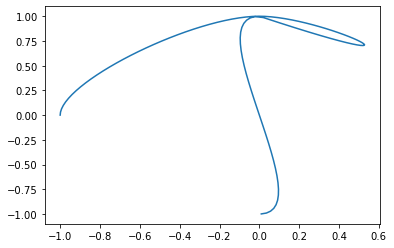

In [82]:
print(np.shape(sol))
plt.plot(sol[:,0], sol[:,1])

2. Use the properties derived so far to derive an algorithm for the following problem:
   
   Given data points $\mathbf a_0,\ldots,\mathbf a_{m-1} \in \mathbb R^d$ and velocities $\mathbf v_0, \mathbf v_1, \ldots, \mathbf v_{m-1}, \in \mathbb R^d$.
   
   Find the _periodic composite cubic Bézier curve_ $\mathbf B(t)$ that maps from $[0,m]$ to $\mathbb R^d$ with the following properties
   * $\mathbf B(0) = \mathbf B(m),$
   * $\mathbf B'(0) = \mathbf B'(m),$
   * $\mathbf B(i) = \mathbf a_i$ for $i=0,\ldots,m-1,$
   * $\mathbf B'(i) = \mathbf v_i$ for $i=0,\ldots,m-1.$

   You can for example first sketch the algorithm or a few ideas in $\LaTeX$.
   
   Then implement a function `interpolate_periodic(A,V)` where `A` is the vector of the interpolation points $[\mathbf a_0,\ldots,\mathbf a_{m-1}]$ and `V` is the vector of the velocities $[\mathbf v_0,\ldots,\mathbf v_{m-1}]$.   
   The function should return a matrix `P` like in the first part to be able to plot the result.

Each cupic Bezier curve is uniquely defined by $4$ points. We want to find $4m$ points to find an unique composition of m cubic Bezier curve. We therefore want to find $4m$ constraints. These we find by requesting periodicity and that the composit Bezier curve lives in $C^{k=1}$. We then define $c_{i, p_n}$ as the point n of the i'th Bezier curve. By inserting this in the result for obtaining a periodic differentiable composit Bezier curve
   1. $\mathbf p_{cn} = \mathbf p_{d0}$
   2. $\mathbf p_{c0} = \mathbf p_{dn}$
   1. $2\mathbf p_{cn} = (\mathbf p_{d1} + \mathbf p_{c,n-1})$
   2. $2\mathbf p_{c0} = (\mathbf p_{d,n-1} + \mathbf p_{c,1})$
we obtain the constraints
$$
c_{i, p_n} = c_{i+1, p_0} = a_i, i = 0, 1, ..., m - 1, m - 1 + 1 = 0
$$
and
$$
a_i - c_{i, p_{n-1}} = c_{i+1, p_{1}} - a_i = v_i, i = 0, 1, ..., m - 1, m - 1 + 1 = 0
$$
Both these contraintequations have $2m$ contraints each, so each point is constrained to 1 value. 

In [83]:
def interpolate_periodic(A,V):
    n = 3 #degree of Bezier curve
    m = len(A)
    P = np.zeros((4, m, 2)) #4 points of m curves in R^2
    for i in range(m):
        P[n,i] = A[i]
        P[0,(i + 1)%m] = A[i]
        P[n-1,i] = A[i] - V[i]/n
        P[1,(i + 1)%m] = V[i]/n + A[i]
    return P

3. Take your favourite letter from the alphabet. Draw its outline – 
i.e. a closed curve surrounding the letter– on a graph paper (those with a regular 2D grid) and take a few measurements of points and velocities. Use this data to illustrate how your function from 2 works. 

   _Hint_: a good idea is to take a letter without holes that only consist of one component like `t` or `T` (maybe not the little boring `l`).
    
   _Bonus Task_: Ignore the hint and do something fancy with `å`, `æ`, `ø`, or even `ß` (though that can be done with one outline in most this fonts).

In [84]:
s = 0.5 #the "speed", controls the "curvyness" of the curve
A = np.array([[1,-3],[0,-3],[0,1],[-2,1],[-2,2],[3,2],[3,1],[1,1]]) #Dataset, forms a T
V = np.array([[-s,0],[0,s],[-s,0],[0,s],[s,0],[0,-s],[-s,0],[0,-s]]) #Velocity set

In [263]:
P = interpolate_periodic(A, V)
print(np.shape(P))
ts = np.linspace(0,len(P[0,:])-0.001,100)
sol = np.array([compositBezier(P, t) for t in ts])

(4, 8, 2)


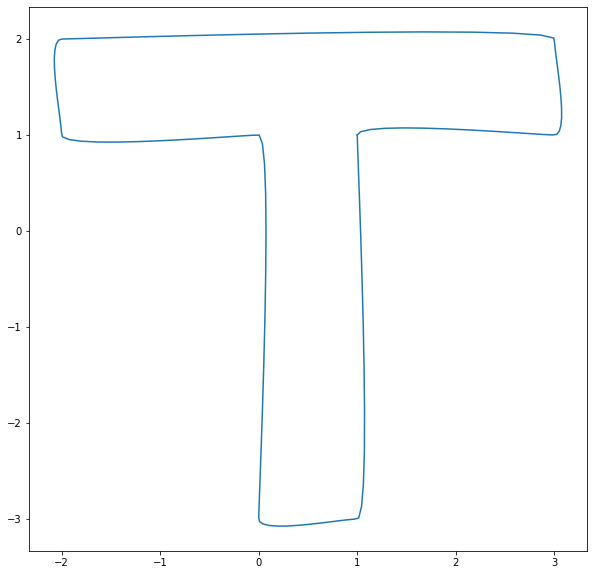

In [86]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(sol[:,0], sol[:,1])

4. Take the resulting control points from part 3 of this problem and create the following new curves with new sets of points given by
   1. `Q` where each $\mathbf q_{i,j} = 2\mathbf p_{i,j}$
   2. `R` where each $\mathbf r_{i,j} = \begin{pmatrix} \cos\frac{\pi}{4} & -\sin\frac{\pi}{4}\\ \sin\frac{\pi}{4} & \cos\frac{\pi}{4}\end{pmatrix}\mathbf p_{i,j}$
   3. `S` where each $\mathbf s_{i,j} = \begin{pmatrix} 1 & \frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\1\end{pmatrix}$
   4. `T` where each $\mathbf t_{i,j} = \begin{pmatrix} -1 & -\frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\-1\end{pmatrix}$
   where each $i=0,1,2,3$ and $j=0,\ldots,m-1$

In [101]:
def get_QRST(P):   
    Q = np.copy(P)
    R = np.copy(P)
    S = np.copy(P)
    T = np.copy(P)
    for i in range(len(P[0,:])):
        for j in range(4):
            Q[j,i,:] = 2*P[j,i,:]
            R[j,i,:] = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
                                 [np.sin(np.pi/4), np.cos(np.pi/4)]])@P[j,i,:]
            S[j,i,:] = np.array([[1, 1/2], 
                                 [1, 0]])@P[j,i,:] + np.array([1, 1])*0.5
            T[j,i,:] = np.array([[-1, -1/2], 
                                 [1, 0]])@P[j,i,:] + np.array([1, -1])*0.5
    return Q, R, S, T

In [102]:
Q, R, S, T = get_QRST(P)

In [103]:
ts = np.linspace(0,len(P[0,:])-0.001,100)
solQ = np.array([compositBezier(Q, t) for t in ts])
solR = np.array([compositBezier(R, t) for t in ts])
solS = np.array([compositBezier(S, t) for t in ts])
solT = np.array([compositBezier(T, t) for t in ts])

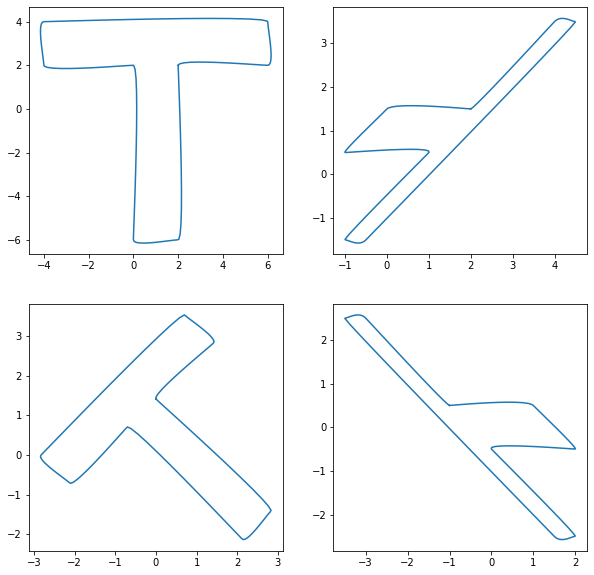

In [104]:
# fig, ax = plt.subplots(2,2, figsize = (10,10))
# Q_max = max(max(solQ[:,0]),max(solQ[:,1]))
# ax[0,0].set_xlim(-0.5*Q_max,0.5*Q_max)
# ax[0,0].set_ylim(-0.5*Q_max,0.5*Q_max)
# ax[0,0].plot(solQ[:,0], solQ[:,1])
# ax[1,0].set_xlim(-0.5*Q_max,0.5*Q_max)
# ax[1,0].set_ylim(-0.5*Q_max,0.5*Q_max)
# ax[1,0].plot(solR[:,0], solR[:,1])
# ax[0,1].set_xlim(-0.5*Q_max,0.5*Q_max)
# ax[0,1].set_ylim(-0.5*Q_max,0.5*Q_max)
# ax[0,1].plot(solS[:,0], solS[:,1])
# ax[1,1].set_xlim(-0.5*Q_max,0.5*Q_max)
# ax[1,1].set_ylim(-0.5*Q_max,0.5*Q_max)
# ax[1,1].plot(solT[:,0], solT[:,1])
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(solQ[:,0], solQ[:,1])
ax[1,0].plot(solR[:,0], solR[:,1])
ax[0,1].plot(solS[:,0], solS[:,1])
ax[1,1].plot(solT[:,0], solT[:,1])

## Problem 4: Optimisation with Bézier curves

Similar to Problem 3, assume we have a composite cubic Bézier curve $\mathbf B(t)$ (here just not necessarily periodic) with $m$ segments, i.e. control points $\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1}, \mathbf p_{0,2}, \mathbf p_{1,2},\ldots,\mathbf p_{3,m}$.
We denote its segments by $\mathbf c_i\colon [i-1,i] \to \mathbb R^2$, for  $i=1,\ldots,m$.
Then $\mathbf B(t)$ is defined on $[0,m]$.
Assume further that $\mathbf B(t)$ is $C^{(1)}$.

1. Due to the property of $\mathbf B(t)$ being continuous, we have
   $\mathbf p_{3,i} = \mathbf p_{0,i+1}$ for $i=1,\ldots,m-1$, so we can omit “storing” the redundant data of $\mathbf p_{3,i}.$
   
   Similarly due to the differentiability we can express $\mathbf p_{2,i}$ using $\mathbf p_{0,i+1}$ and $\mathbf p_{1,i+1}$ for each $i=1,\ldots,m-1$. What does this expression look like?
   
   _Bonus question_: The “data” we store for $\mathbf p_{2,i}$ and/or $\mathbf p_{1,{i+1}}$ is just one vector in $\mathbb R^d$. Can we phrase this information in terms of the velocity $\mathbf v_{i+1}$ at $\mathbf p_{0,i+1}$, i.e. such that from this velocity we can recover both “neighboring” points?

Same as 3.2 but written in another convention.
$$
2c_{i+1, p_0}- c_{i, p_{n-1}} = c_{i+1, p_{1}} - 2c_{i+1, p_0} \iff
p_{2, i} = 2p_{0, i+1} - p_{1, i + 1}
$$

Bonus: From 3.2 we have the relation P[n-1,i] = A[i] - V[i], P[1,(i + 1)%m] = V[i] + A[i] in python code, just from translating to latex math we get:
$$
p_{2, i} = 2p_{0, i+1} - p_{1, i + 1} \iff
\frac{p_{2, i} + p_{1, i + 1}}{2} = p_{0, i+1} $$


2. We want to minimize the (squared) acceleration of the curve
   $$
   F(\mathbf P)
   =
   \int_{0}^{m} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   with respect to the remaining control points
   $$
   \mathbf P= [\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{0,2}, \mathbf p_{1,2}, \ldots, \mathbf p_{0,m-1}, \mathbf p_{1,m-1} \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m}, ].
   $$

   For simplicity we only consider one segment, i.e. for $\mathbf q_0,\mathbf q_1, \mathbf q_2, \mathbf q_3 \in \mathbb R^2$, we consider the cubic Bézier curve $\mathbf b_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$.
   
   First derive a closed form for the integral
   
   $$
   \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\ \mathrm{d} t
   $$
   
   in order to derive the gradient of 
   $$
   \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\rVert_2^2 \ \mathrm{d} t
   $$
   and with respect to the control points $\mathbf q_i, i=0,\ldots,3$.
   
   While we do not want to write down the whole gradient of $F$, please sketch how you can use the result of $\tilde F$ to compute the gradient of $F$. Remember that $\mathbf B(t)$ is continuously differentiable.

**Solution**


Knows that the second derivative of a Bézier curve $\mathbf c(t)$ is
$$
\mathbf c''(t) = n(n-1)\sum_{i=0}^{n}\mathbf p_i\left(B_{i-2,n-2}(t) + B_{i,n-2}(t) - 2B_{i-1,n-2}(t)\right).
$$
Which in our case becomes 
$$
\mathbf b_3''(t;\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = 6\sum_{i=0}^{3}\mathbf q_i\left(B_{i-2,1}(t) + B_{i,1}(t) - 2B_{i-1,1}(t)\right) 
$$
$$
= 6\left(\mathbf q_0B_{0,1}(t) + \mathbf q_1\left(B_{1,1}(t) - 2B_{0,1}(t)\right)+\mathbf q_2\left(B_{0,1}(t) - 2B_{1,1}(t)\right) + \mathbf q_3B_{1,1}(t)\right)
$$
$$
= 6\left(B_{0,1}(t)\left(\mathbf q_0 - 2\mathbf q_1 + \mathbf q_2\right) + B_{1,1}(t)\left(\mathbf q_1 - 2\mathbf q_2 + \mathbf q_3\right)\right) = (1-t)\mathbf b_3''(0) + t\mathbf b_3''(1).
$$

Where we have sat $\mathbf b_3''(t;\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \mathbf b_3''(t)$ for simplicity. We can then write $\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$ as

$$
\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_{0}^1\|(1-t)\mathbf b_3''(0) + t\mathbf b_3''(1)\|^2_2 dt = \int_0^1\sum_{i = 1}^2\Big((1-t)\mathbf b_3''(0)_i + t\mathbf b_3''(1)_i\Big)^2 dt
$$
$$
= \sum_{i= 1}^2\int_0^1(1-t)^2(\mathbf b_3''(0)_i)^2 + 2(1-t)t\mathbf b_3''(0)_i\mathbf b_3''(1)_i + t^2(\mathbf b_3''(1)_i)^2 dt
$$
$$
= \frac13 \sum_{i = 1}^2\left((\mathbf b_3''(0)_i)^2 + \mathbf b_3''(0)_i \mathbf b_3''(1)_i + (\mathbf b_3''(1)_i)^2\right) = \frac13 \sum_{i = 1}^2\left((\mathbf b_3''(0)_i + \mathbf b_3''(1)_i)^2 - \mathbf b_3''(0)_i\mathbf b_3''(1)_i\right)
$$
$$
= \frac13\left(\|\mathbf b_3''(0) + \mathbf b_3''(1)\|_2^2 - \mathbf b_3''(0)^T\mathbf b_3''(1)\right).
$$

We can express this in terms of the coordinates $\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3$.

$$
\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)  = 6^2\frac13\left(\|\mathbf q_0 - \mathbf q_1 - \mathbf q_2 + \mathbf q_3\|_2^2 - (\mathbf q_0^T - 2\mathbf q_1^T + \mathbf q_2^T)(\mathbf q_1 - 2\mathbf q_2 + \mathbf q_3)\right).
$$
We look at the terms individually.
$$
(\mathbf q_0^T - 2\mathbf q_1^T + \mathbf q_2^T)(\mathbf q_1 - 2\mathbf q_2 + \mathbf q_3)
$$
$$
= \mathbf q_0^T\mathbf q_1 - 2\mathbf q_0^T\mathbf q_2 + \mathbf q_0^T\mathbf q_3 - 2\mathbf q_1^T\mathbf q_1 + 5 \mathbf q_1^T\mathbf q_2 - 2\mathbf q_1^T\mathbf q_3 - 2\mathbf q_2^T\mathbf q_2 + \mathbf q_2^T\mathbf q_3.
$$

$$
\|\mathbf q_0 - \mathbf q_1 - \mathbf q_2 + \mathbf q_3\|_2^2 = \left(\mathbf q_0 - \mathbf q_1 - \mathbf q_2 + \mathbf q_3\right)^T\left(\mathbf q_0 - \mathbf q_1 - \mathbf q_2 + \mathbf q_3\right)
$$
$$
= \mathbf q_0^T\mathbf q_0 + \mathbf q_1^T\mathbf q_1 + \mathbf q_2^T\mathbf q_2 + \mathbf q_3^T\mathbf q_3 - 2\mathbf q_0^T\mathbf q_1 - 2\mathbf q_0^T\mathbf q_2 + \mathbf q_0^T\mathbf q_3 + 2\mathbf q_1^T\mathbf q_2 - 2 \mathbf q_1^T\mathbf q_3 - 2\mathbf q_2^T\mathbf q_3.
$$

Where we have used that $\mathbf q_i^T\mathbf q_j = \mathbf q_j^T\mathbf q_i$ for vectors $\mathbf q_i, \mathbf q_j$ in $ \mathbb R^d $.
We now put these terms together and get that 
$$
\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) =12\left( \mathbf q_0^T\mathbf q_0 + 3\mathbf q_1^T\mathbf q_1 + 3\mathbf q_2^T\mathbf q_2 + \mathbf q_3^T\mathbf q_3 - 3\mathbf q_0^T\mathbf q_1 + \mathbf q_0^T\mathbf q_3 - 3\mathbf q_1^T\mathbf q_2 - 3\mathbf q_2^T\mathbf q_3\right).
$$

Now we can take the gradient of $\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$ with respect to $\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3$.

$$
\nabla\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = 12
\begin{pmatrix}
2\mathbf q_0 - 3\mathbf q_1 + \mathbf q_3 \\
6\mathbf q_1 - 3\mathbf q_0 - 3\mathbf q_2 \\
6\mathbf q_2 - 3\mathbf q_1 - 3\mathbf q_3 \\
2 \mathbf q_3 + \mathbf q_0 - 3\mathbf q_2
\end{pmatrix} \in \mathbb R^8
$$

We are now capable of expressing the gradient of $F$.
Since the curve is composite, when can disolve the integral into a sum. If we let $\mathbf P_i = (\mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})$ we can write
$$
\nabla F(\mathbf P) = \nabla \sum_{i = 1}^m \tilde F(\mathbf P_i) 
$$
$$
= 12\nabla\Biggl( \sum_{i = 1}^{m} \left( \mathbf p_{0,i}^T\mathbf p_{0,i} + 3\mathbf p_{1,i}^T\mathbf p_{1,i} + 3\mathbf p_{2,i}^T\mathbf p_{2,i} + \mathbf p_{3,i}^T\mathbf p_{3,i} - 3\mathbf p_{0,i}^T\mathbf p_{1,i} + \mathbf p_{0,i}^T\mathbf p_{3,i} - 3\mathbf p_{1,i}^T\mathbf p_{2,i} - 3\mathbf p_{2,i}^T\mathbf p_{3,i}\right)\Biggr)
$$

If we now use that $\mathbf p_{3,i} = \mathbf p_{0,i+1}$ and that $\mathbf p_{2,i} = 2\mathbf p_{0,i+1} - \mathbf p_{1,i+1}$ due to continuity and continuity in the first derivative, we can express $\nabla F(\mathbf P)$ as

$$
12\nabla\Biggl(\mathbf p_{0,1}^T\mathbf p_{0,1} + 3\mathbf p_{1,1}^T\mathbf p_{1,1} - 3\mathbf p_{0,1}^T\mathbf p_{1,1} + 3\mathbf p_{2,m}^T\mathbf p_{2,m} + \mathbf p_{3,m}^T\mathbf p_{3,m} + \mathbf p_{0,m}^T\mathbf p_{3,m} - 3\mathbf p_{1,m}^T\mathbf p_{2,m}
+\sum_{i = 2}^{m} \left( 8\mathbf p_{0,i}^T\mathbf p_{0,i} + 6\mathbf p_{1,i}^T\mathbf p_{1,i} -12\mathbf p_{0,i}^T\mathbf p_{1,i} + \mathbf p_{0,i-1}^T\mathbf p_{0,i} + 3\mathbf p_{1,i-1}^T\mathbf p_{1,i-1} - 6\mathbf p_{1,i-1}^T\mathbf p_{0,i}\right)\Biggr).
$$
$$
= 12\begin{pmatrix}
2\mathbf p_{0,1} - 3\mathbf p_{1,1} + \mathbf p_{0,2} \\
12 \mathbf p_{1,1} - 3\mathbf p_{0,1} - 6 \mathbf p_{0,2} \\
\vdots \\
16\mathbf p_{0,i} - 12 \mathbf p_{1,i} + \mathbf p_{0,i-1} - 6 \mathbf p_{1,i-1} \\
12\mathbf p_{1,i} - 12 \mathbf p_{0,i} \\
\vdots \\
\mathbf p_{3,m} + 16 \mathbf p_{0,m} - 12 \mathbf p_{1,m} + \mathbf p_{0,m-1} - 6\mathbf p_{1,m-1} \\
-3 \mathbf p_{2,m} + 12 \mathbf p_{1,m} - 12 \mathbf p_{0,m} \\
6\mathbf p_{2,m} - 3\mathbf p_{1,m} \\
2\mathbf p_{3,m} +\mathbf p_{0,m}
\end{pmatrix}
$$

Which is an expression consisting of $m$ $\mathbf p_{0,i}$, $m$ $\mathbf p_{1,i}$, one $\mathbf p_{2,m}$ and one $\mathbf p_{3,m}$, i.e $2m + 2$ diffrent vectors in $\mathbb R^2$. Therefore we expect the gradient to be of dimension $4m + 4$.

3. Look at the first order optimality conditions of the optimisation task to minimize $\tilde F$ from the last part.
   How can we find such a minimiser?
   Is the solution unique?
   
   For the overall problem $F$ we even have to take into account the properties from the fist part. What about the solution now? Is it unique? You may argue intuitively here or provide a concrete example of two minimisers for a 2-segment curve, i.e. $m=2$.

We find the minimiser of $\tilde F$ by solving $\nabla \tilde F = \mathbf 0$, i.e
$$
\nabla\tilde F(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = 12
\begin{pmatrix}
2\mathbf q_0 - 3\mathbf q_1 + \mathbf q_3 \\
6\mathbf q_1 - 3\mathbf q_0 - 3\mathbf q_2 \\
6\mathbf q_2 - 3\mathbf q_1 - 3\mathbf q_3 \\
2 \mathbf q_3 + \mathbf q_0 - 3\mathbf q_2
\end{pmatrix} = \mathbf 0.
$$
Which then is a system with eight equations and $4 \cdot 2 = 8$ unknowns, in other terms the solution of this system will be unique if it exists.

For the overall problem $F$ we want to solve $\nabla F = \mathbf 0$. Which means that we are dealing with $m$ $\mathbf p_{0,i}$, $m$ $\mathbf p_{1,i}$, 1 $\mathbf p_{2,m}$ and 1 $\mathbf p_{3,m}$ which all have two coordinates, meaning that in total we have a system of eight equations and $(2m +2)\cdot 2 = 4m + 4$ unknowns. Thus if $m = 1 $ we can have a unique solution, elsewhere we have too few equations for this system to have an unique solution. 

4. Assume we extend the problem to have some (data) points $\mathbf d_i \in \mathbb R^2$, $i=0,\ldots,m$ given and we extend the problem to
   $$
   G_\lambda(\mathbf P)
   =
   \frac{\lambda}{2}\sum_{i=0}^{m} \lVert \mathbf d_i - \mathbf B(i) \rVert_2^2 + \int_{0}^{m} \lVert   \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   
   We again can first look at the simplified problem: Given two points $\mathbf s, \mathbf e \in \mathbb R^2$ consider for some $\lambda > 0$ the function for one segment, namely
   
   $$
   \begin{split}
   \tilde G_\lambda(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) &= \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf b_3(0; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2 + \lVert \mathbf e - \mathbf b_3(1; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\\
   &=
   \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf q_0 \rVert_2^2 + \lVert \mathbf e - \mathbf q_3 \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)
   \end{split}
   $$
   
   Does this change the question about uniqueness?
   Without programming / testing, just intuitively:
   What does this model do, if you let $\lambda$ tend to zero? What does it do, if you let $\lambda$ tend to $\infty$?
   
   Similarly to part 3 of this problem, what does change for $G_\lambda$ in comparison to $F$ concerning uniqueness? what does the $\lambda$ change here (if very large or very small)?

**Solution**
$$
\nabla \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf q_0 \rVert_2^2 + \lVert \mathbf e - \mathbf q_3 \rVert_2^2\Bigr)
= \lambda \begin{pmatrix}\mathbf q_0 - \mathbf s \\ 0 \\ 0 \\ \mathbf q_3 - \mathbf e\end{pmatrix}
$$

This means that 
$$ \nabla \tilde G_\lambda = \lambda \begin{pmatrix}\mathbf q_0 - \mathbf s \\ 0 \\ 0 \\ \mathbf q_3 - \mathbf e\end{pmatrix} + 12
\begin{pmatrix}
2\mathbf q_0 - 3\mathbf q_1 + \mathbf q_3 \\
6\mathbf q_1 - 3\mathbf q_0 - 3\mathbf q_2 \\
6\mathbf q_2 - 3\mathbf q_1 - 3\mathbf q_3 \\
2 \mathbf q_3 + \mathbf q_0 - 3\mathbf q_2
\end{pmatrix} = \mathbf 0.
$$



<!-- We have the same amount of equations (dimension of parameter space), but we get another $2$ constraints by the first term
$\frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf q_0 \rVert_2^2 + \lVert \mathbf e - \mathbf q_3 \rVert_2^2\Bigr)$, or $m+1$ more constraints for $G_\lambda$. This makes the solution in $m = 3$ unique by matching constraints with unknowns in each of the gradients of $G_\lambda$, and for $m = 1$ and $m = 2$ we get overdetermined systems of equations, which will solve for some $d_i \in \mathbb R^2$, and for others the mi -->

As long as $\lambda$ is not something exact that cancels terms in the gradient equation, no additional constraints are provided, and the uniqueness of minimizers will be the same as befor.

A big $\lambda$ makes the first term in $\tilde G_{\lambda}$ much greater than the second term for $p_0$ and $p_3$, so those must be chosen to be $s$ and $e$ respectivly. The two others points are then chosen as the $p_1$ and $p_2$ that solve the system
$$\begin{pmatrix}
6\mathbf q_1 - 3\mathbf q_2 \\
6\mathbf q_2 - 3\mathbf q_1 \\
\end{pmatrix} = \begin{pmatrix}
3\mathbf s \\
3\mathbf e \\
\end{pmatrix}
$$

A small $\lambda$ reduses the problem to that of $3.3$.

5. Use the previous parts to derive a gradient descent algorithm to minimize $G_\lambda(\mathbf P)$ with respect to the control points $\mathbf P$. You may use a constant step size.

   Take as an example your letter from Problem 3 as input $\mathbf P$ for your algorithm and two different values of $\lambda$. How does the letter change?

In [156]:
def steepestdescent(A,b,x0,tol,maxiter, timetrack = False):
    count = 0
    r0 = b - A@x0
    r = r0
    error = 1
    x = x0
    
    #Tracking time
    if timetrack:
        current_time1 = datetime.now()

    while error > tol: #norm = the standard 2-norm
        
        count += 1
        
        ################## All but this block are identical across the methods ##########################
        
        
        w = np.transpose(r) @ r / (np.transpose(r) @ A @ r)
        x_new = x + w*r
        r = r - w*A@r
        
       
        ################# End of uniqueness #####################
        x = x_new
        error = np.linalg.norm(r)/np.linalg.norm(r0)
        if count > maxiter:
            print("Error: Tollerance not reached before maxiter")
            return
    print("Solution with error under tolerance reached \n")
    
    if timetrack:
        current_time2 = datetime.now()
        print("Time elapsed =", current_time2-current_time1)
    print(f"Final error = {error:.2e} \nNumber of iterations = {count}")
    
    return x, error, count

$$
A =\sum_{i=1}^{m}
\lambda \begin{pmatrix}\mathbf p_{0,i} \\ 0 \\ 0 \\ \mathbf p_{3,i}\end{pmatrix}
+12
\begin{pmatrix}
2\mathbf p_{0,1} - 3\mathbf p_{1,1} + \mathbf p_{3,m} \\
6\mathbf p_{1,1} - 3 \mathbf p_{0,1} - 3\mathbf p_{2,m} \\
6\mathbf p_{2,m} - 3 \mathbf p_{1,1} - 3\mathbf p_{3,m}\\
2\mathbf p_{3,m} + \mathbf p_{0,1} - 3 \mathbf p_{2,m}
\end{pmatrix}
+12\sum_{i = 2}^m
\begin{pmatrix}
3\mathbf p_{0,i} - 3\mathbf p_{1,i} \\
9 \mathbf p_{1,i} - 9 \mathbf p_{0,i} \\
9 \mathbf p_{0,i} - 9\mathbf p_{1,i} \\
3\mathbf p_{0,i} - 3\mathbf p_{1,i} \\
\end{pmatrix}.
$$
$$
b = \sum_{i=1}^{m}
\lambda \begin{pmatrix}\mathbf d_{i-1} \\ 0 \\ 0 \\ \mathbf d_{i}\end{pmatrix}
$$

$$
x_0 = P
$$

In [184]:
def gausseidel(A,b,x0,tol,maxiter):
    count = 0
    r0 = b - A@x0
    r = r0
    error = 1
    x = x0
    
    #Tracking time
    current_time1 = datetime.now()
    
    #Additive splitting
    F = np.triu(A,1)
    N = F
    P = A + N
    while error > tol: #norm = the standard 2-norm
        
        count += 1
        
        ################## All but block are identical across the methods (exept the additive split done over for this one)
        
        r = b - A@x
        x_new = x + lng.solve_triangular(P,r)
        
       
        ################# End of uniqueness #####################
        x = x_new
        error = np.linalg.norm(r)/np.linalg.norm(r0)
        if count > maxiter:
            print("Error: Tollerance not reached before maxiter")
            return x, error, count
    print("Solution with error under tolerance reached \n")
    
    current_time2 = datetime.now()
    print("Time elapsed =", current_time2-current_time1)
    print(f"Final error = {error:.2e} \nNumber of iterations = {count}")
    
    return x, error, count

In [249]:
def make_A(d, lamb):
    m = len(d)
    A = np.zeros((8*m, 8*m))
    A = np.zeros(((m-1)*4 + 8,(m-1)*4 + 8))
    for i in range(m):
        if i == 0:
            grad_F = 12* np.array([[2, 3, 0, 1, 0, 0, 0, 0], #A[0:8,0:8]
                                   [0, 0, 0, 0, 2, 3, 0, 1], 
                                   [-3, 6, -3, 0, 0, 0, 0, 0], 
                                   [0, 0, 0, 0, -3, 6, -3, 0],
                                   [0, -3, 6, -3, 0, 0, 0, 0], 
                                   [0, 0, 0, 0, 0, -3, 6, -3], 
                                   [1, 0, -3, 2, 0, 0, 0, 0], 
                                   [0, 0, 0, 0, 1, 0, -3, 2]])
            A[8*i:8*i + 8, 8*i:8*i + 8] = grad_F + lamb*np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
                                                                  [0, 0, 0, 0, 1, 0, 0, 0],
                                                                  [0, 0, 0, 0, 0, 0, 0, 0], 
                                                                  [0, 0, 0, 0, 0, 0, 0, 0],
                                                                  [0, 0, 0, 0, 0, 0, 0, 0], 
                                                                  [0, 0, 0, 0, 0, 0, 0, 0], 
                                                                  [0, 0, 0, 1, 0, 0, 0, 0], 
                                                                  [0, 0, 0, 0, 0, 0, 0, 1]])
        else:
            grad_F = 12* np.array([[2, 3, 0, 1, 0, 0, 0, 0], #A[4:12,4:12]
                                   [0, 0, 0, 0, 2, 3, 0, 1], 
                                   [-3, 6, -3, 0, 0, 0, 0, 0], 
                                   [0, 0, 0, 0, -3, 6, -3, 0],
                                   [0, -3, 6, -3, 0, 0, 0, 0], 
                                   [0, 0, 0, 0, 0, -3, 6, -3], 
                                   [1, 0, -3, 2, 0, 0, 0, 0], 
                                   [0, 0, 0, 0, 1, 0, -3, 2]])
#             print("Shape: ", np.shape(A[4*i:+4*i + 8,4*i:4*i + 8])," starting at:", 4*i, '\n')
#             print("Before: ", A[4*i:+4*i + 8,4*i:4*i + 8])
            A[4*i:+4*i + 8,4*i:4*i + 8] += grad_F + lamb*np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
                                                                                      [0, 0, 0, 0, 1, 0, 0, 0],
                                                                                      [0, 0, 0, 0, 0, 0, 0, 0], 
                                                                                      [0, 0, 0, 0, 0, 0, 0, 0],
                                                                                      [0, 0, 0, 0, 0, 0, 0, 0], 
                                                                                  [0, 0, 0, 0, 0, 0, 0, 0], 
                                                                                      [0, 0, 0, 1, 0, 0, 0, 0], 
                                                                                      [0, 0, 0, 0, 0, 0, 0, 1]])
#             print("\n After: ", A[4*i:+4*i + 8,4*i:4*i + 8])
            
    return A
        
        
        
    
    

Neste gang: Legge inn constraints i A og b. ligningsystemet AP = b er nå uløslig da A er singulær. b har skal ha 2m + 4 ukjente entries bare, da kun to punkter er ukjene for alle bezier curver utenom den første om kontinuitet i den første deriverte skal være oppfylt. 

In [278]:
def make_b(d, lamb):
    m = len(d) #Cubic
    b = np.zeros((8*m))
    b = np.zeros((m-1)*4 + 8)

    for i in range(m - 1):
        if i == 0:
            b00 = d[i][0]
            b01= d[i][1]
            b30 = d[i+1][0]
            b31= d[i+1][1]
            b[:8] = lamb*np.array([b00, 0, 0, b30, b01, 0, 0, b31])
        else:
            b30 = d[i+1][0]
            b31= d[i+1][1]
            b[4*i:4*i+4] = lamb*np.array([0, b30, 0, b31])#Since the first two points are already decided for satisifying
            # k=1 continuity       
    return b

In [293]:
lamb_eks = 1
A_eks = make_A(A[2:4], lamb_eks)
b_eks = make_b(A[2:4], lamb_eks)
print(A_eks)
print(np.shape(A_eks))
print(b_eks)
print(np.shape(b_eks))

np.linalg.solve(A_eks,b_eks)

[[ 25.  36.   0.  12.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  25.  36.   0.  12.   0.   0.   0.   0.]
 [-36.  72. -36.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -36.  72. -36.   0.   0.   0.   0.   0.]
 [  0. -36.  72. -36.  25.  36.   0.  12.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -36.  72. -36.  25.  36.   0.  12.]
 [ 12.   0. -36.  25. -36.  72. -36.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  12.   0. -36.  25. -36.  72. -36.   0.]
 [  0.   0.   0.   0.   0. -36.  72. -36.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. -36.  72. -36.]
 [  0.   0.   0.   0.  12.   0. -36.  25.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  12.   0. -36.  25.]]
(12, 12)
[ 0.  0.  0. -2.  1.  0.  0.  1.  0.  0.  0.  0.]
(12,)


array([-1.313,  0.023,  1.359,  2.667,  0.354, -0.023, -0.345, -0.667,
       -0.177,  0.012,  0.173,  0.333])

In [280]:
x0 = np.ravel(P)[0:36]
print(P)
maxiter = 1000
tol = 1E-7
from scipy.optimize import minimize

[[[ 1.     1.   ]
  [ 1.    -3.   ]
  [ 0.    -3.   ]
  [ 0.     1.   ]
  [-2.     1.   ]
  [-2.     2.   ]
  [ 3.     2.   ]
  [ 3.     1.   ]]

 [[ 1.     0.833]
  [ 0.833 -3.   ]
  [ 0.    -2.833]
  [-0.167  1.   ]
  [-2.     1.167]
  [-1.833  2.   ]
  [ 3.     1.833]
  [ 2.833  1.   ]]

 [[ 1.167 -3.   ]
  [ 0.    -3.167]
  [ 0.167  1.   ]
  [-2.     0.833]
  [-2.167  2.   ]
  [ 3.     2.167]
  [ 3.167  1.   ]
  [ 1.     1.167]]

 [[ 1.    -3.   ]
  [ 0.    -3.   ]
  [ 0.     1.   ]
  [-2.     1.   ]
  [-2.     2.   ]
  [ 3.     2.   ]
  [ 3.     1.   ]
  [ 1.     1.   ]]]


In [179]:
# sol = minimize(A, x0)

In [281]:
sol, error, count = gausseidel(A_eks,b_eks,x0,tol,maxiter)

LinAlgError: singular matrix: resolution failed at diagonal 1

In [277]:
sol, error, count = steepestdescent(A_eks,b_eks,x0,tol,maxiter)

Solution with error under tolerance reached 

Final error = nan 
Number of iterations = 145


<ipython-input-156-132b7aca7769>:19: RuntimeWarning: overflow encountered in matmul
  w = np.transpose(r) @ r / (np.transpose(r) @ A @ r)
<ipython-input-156-132b7aca7769>:19: RuntimeWarning: invalid value encountered in matmul
  w = np.transpose(r) @ r / (np.transpose(r) @ A @ r)
